# Avocado Price Analysis provided on Kaggle
#### Historical data on Avocado prices and sales volume in multiple US markets.

## Dataset:

Some relevant columns in the dataset:

Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>

## Let's Start...

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import datetime

In [2]:
avocado_df = pd.read_csv(r"C:\Users\sarthak\Downloads\Datasets\avocado.csv")

In [3]:
avocado_df.drop(avocado_df.columns[0],axis=1,inplace=True)

In [4]:
avocado_df = avocado_df.rename(columns={"4046":"Type_A","4225":"Type_B","4770":"Type_C"})

In [5]:
avocado_df["Month"] = pd.DatetimeIndex(avocado_df["Date"]).month
month_name = {1:"January",2:"Febuary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
avocado_df["month"] = avocado_df["Month"].map(month_name)

In [6]:
avocado_df.head()

,Date,AveragePrice,Total Volume,Type_A,Type_B,Type_C,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November


# Variation of Average price of Avocado

* We will see how the average price of avocado changes with different parameters. With the given data, we can see how the average price over time, does it increase predominantly or decreases or have some trend in price.<br>
* Has the price of avocados changed per year, did it get lower or increased with time.
* Is there pattern or trend in prices based on month. Does the month of a particular year affect the price of avocado?
* How the change in price of organic avocado different from conventional avocado?
* Which region has the highest and lowest average price of avocado.

Text(0.5, 1.0, 'Average Price over time')

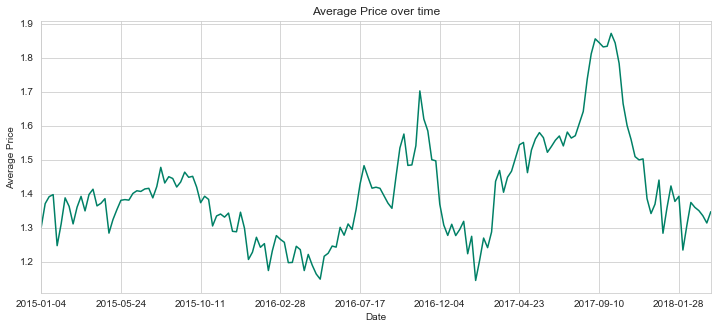

In [109]:
plt.figure(figsize=(12,5))
avocado_df.groupby("Date")["AveragePrice"].mean().plot(cmap='summer')
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Average Price over time")

#### It seems that there is always a kind of peak in Average Price towards the end of year. Also, we can see that the peak is also gradually increasing with years passing by. Highest peak is during the end of the year 2017.

Text(0.5, 1.0, 'Average Price throughout the year')

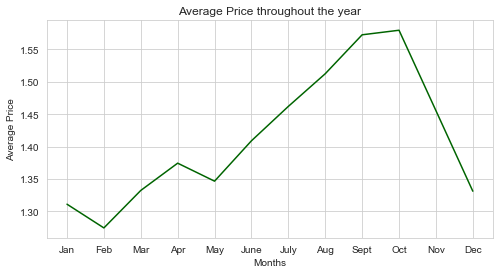

In [21]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July","Aug", "Sept", "Oct", "Nov", "Dec"]
plt.figure(figsize=(8,4))
plt.plot(months,avocado_df.groupby("Month")["AveragePrice"].mean(),color='darkgreen')
plt.xlabel("Months")
plt.ylabel("Average Price")
plt.title("Average Price throughout the year")

#### Price of avocado increases as the year end approaches. Prices are low during start of the year, and as the year passes by the prices increases linearly and achieves the peak in September and October.

Text(0.5, 1.0, 'Average Price per year')

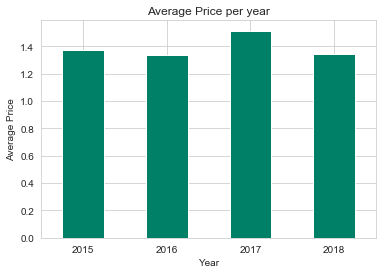

In [28]:
avocado_df.groupby("year")["AveragePrice"].mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Price per year")

#### The price of avocado has not been changed much in 4 years, however there is some fluctuation in price which do not has any trend. Price of Avocados was at all time high in 2017 and all time low in 2016.

Text(0.5, 1.0, 'Average Price across the year for different type of Avocado')

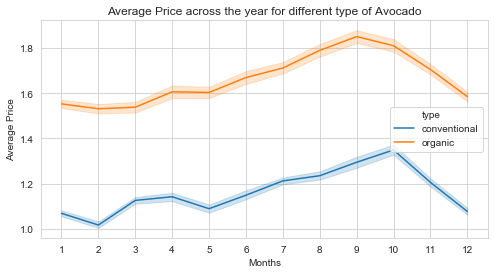

In [50]:
plt.figure(figsize=(8,4))
sns.lineplot("Month","AveragePrice",hue="type",data=avocado_df)
plt.legend(loc="center right")
plt.xticks(range(1,13))
plt.xlabel("Months")
plt.ylabel("Average Price")
plt.title("Average Price across the year for different type of Avocado")

#### We can see from this graph that Average price of both types of avocado increased gradually throughout the year and then peaks around September or October and then peaks down. Also, the average price of organic avocado is 40 - 50 percent more than conventional avocado. Also, Average price increases very gradually from May to September/October.

Text(0.5, 0, 'Type')

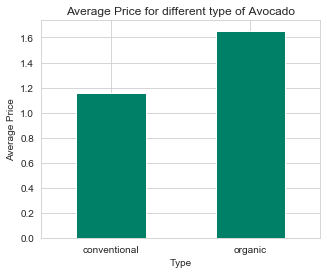

In [93]:
plt.figure(figsize=(5,4))
avocado_df.groupby("type")["AveragePrice"].mean().plot(kind="bar",cmap='summer')
plt.xticks(rotation="horizontal")
plt.ylabel("Average Price")
plt.title("Average Price for different type of Avocado")
plt.xlabel("Type")

#### Average Price of Organic avocado is 50 percent more than conventional one's.

(1, 1.25)

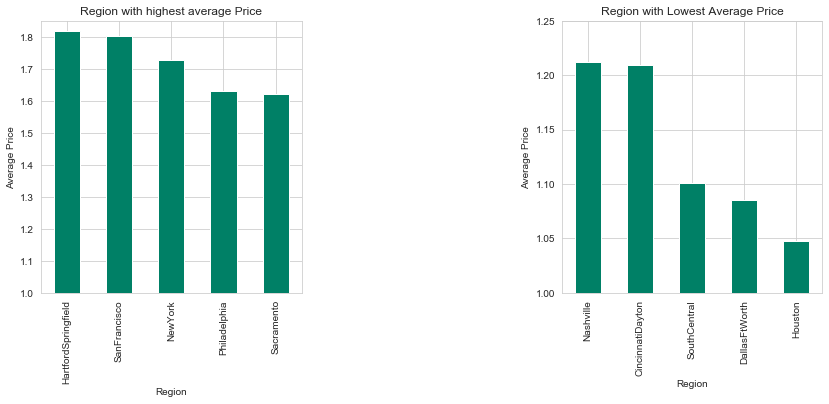

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
avocado_df.groupby("region")["AveragePrice"].mean().sort_values(ascending=False).head(5).plot(kind="bar",cmap='summer')
plt.title("Region with highest average Price")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.ylim(1,1.85)
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,2)
avocado_df.groupby("region")["AveragePrice"].mean().sort_values(ascending=False).tail(5).plot(kind="bar",cmap='summer')
plt.title("Region with Lowest Average Price")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.ylim(1,1.25)

# Variation in volume sold of Avocado

#### There are 3 types of avocado sold in different regions and at different prices.
* Does the volume of avocado sold increased or decreased per year.
* Is there any trend in volume of avocados sold through out the year.
* Is there any trend in volume of different type of avocados sold from 4 years.
* What are the regions with highest and lowest volume sold.

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

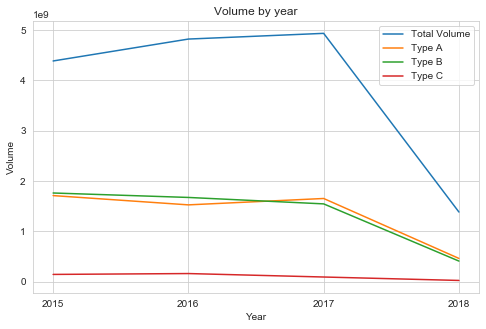

In [66]:
years = ["2015","2016","2017","2018"]
plt.figure(figsize=(8,5))
plt.plot(years,avocado_df.groupby("year")["Total Volume"].sum())
plt.plot(years,avocado_df.groupby("year")["Type_A"].sum())
plt.plot(years,avocado_df.groupby("year")["Type_B"].sum())
plt.plot(years,avocado_df.groupby("year")["Type_C"].sum())
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Volume by year")
plt.legend(["Total Volume","Type A","Type B","Type C"],loc="best")
plt.xticks(rotation="horizontal")

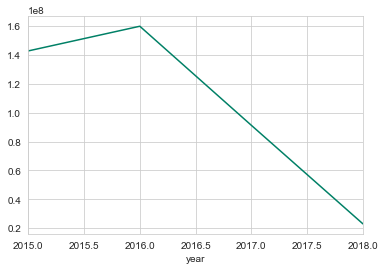

In [79]:
avocado_df.groupby("year")["Type_C"].sum().plot(cmap='summer')

#### Type C has a flat sales. At first, it looks that Type C has very flat sales (does not change much with time), but in second figure we can see that there is decline in volume of it after 2016. Volume is very less compared to Type A and Type B, thats why we were not able to see any significant change in graph.

Text(0.5, 1.0, 'Volume of Avocado sold throughout the year')

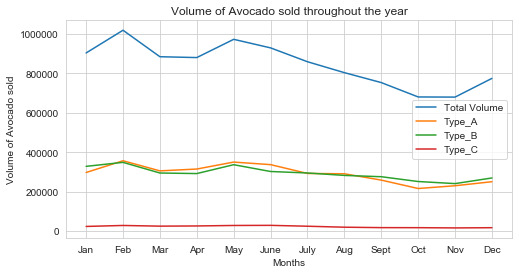

In [22]:
plt.figure(figsize=(8,4))
plt.plot(months,avocado_df.groupby("Month")["Total Volume"].mean())
plt.plot(months,avocado_df.groupby("Month")["Type_A"].mean())
plt.plot(months,avocado_df.groupby("Month")["Type_B"].mean())
plt.plot(months,avocado_df.groupby("Month")["Type_C"].mean())
plt.legend(["Total Volume","Type_A","Type_B","Type_C"],loc="best")
plt.xlabel("Months")
plt.ylabel("Volume of Avocado sold")
plt.title("Volume of Avocado sold throughout the year")

#### Volume of avocados sold decreased as year end progresses. The pattern is similar for all kind of avocados.

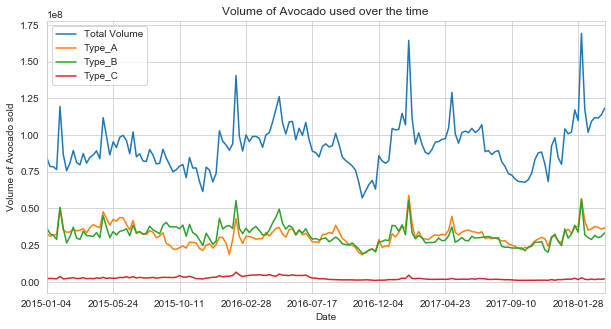

In [15]:
plt.figure(figsize=(10,5))
avocado_df.groupby("Date")["Total Volume"].sum().plot()
avocado_df.groupby("Date")["Type_A"].sum().plot()
avocado_df.groupby("Date")["Type_B"].sum().plot()
avocado_df.groupby("Date")["Type_C"].sum().plot()
plt.ylabel("Volume of Avocado sold")
plt.title("Volume of Avocado used over the time")
plt.legend(["Total Volume","Type_A","Type_B","Type_C"],loc="best")

Text(0, 0.5, 'Volume')

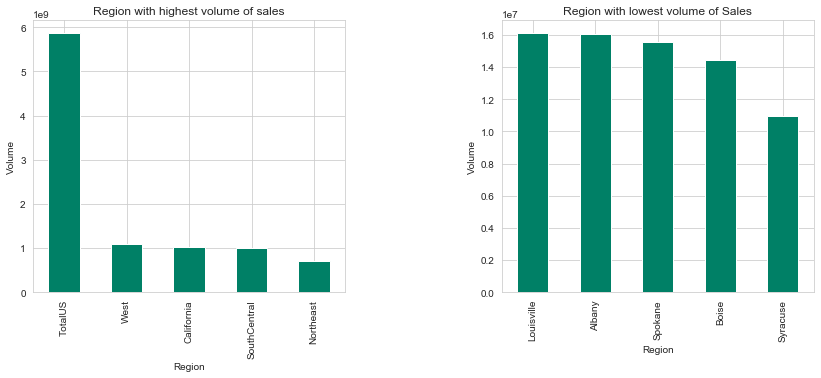

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
avocado_df.groupby("region")["Total Volume"].sum().sort_values(ascending=False).head().plot(kind='bar',cmap='summer')
plt.subplots_adjust(wspace=0.5)
plt.title("Region with highest volume of sales")
plt.ylabel("Volume")
plt.xlabel("Region")
plt.subplot(1,2,2)
avocado_df.groupby("region")["Total Volume"].sum().sort_values(ascending=False).tail().plot(kind='bar',cmap='summer')
plt.title("Region with lowest volume of Sales")
plt.xlabel("Region")
plt.ylabel("Volume")

# Is there any relation between price and volume sold?

Text(0.5, 0, 'Months')

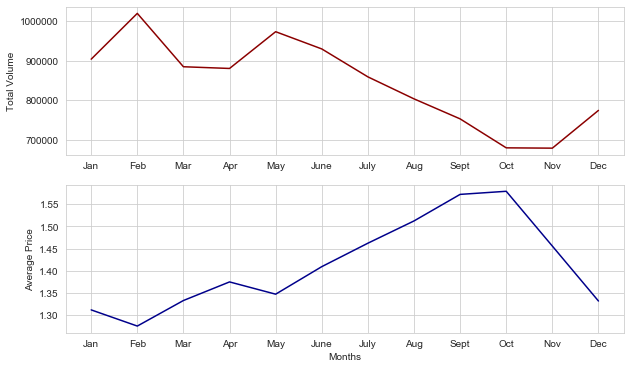

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(months,avocado_df.groupby("Month")["Total Volume"].mean(),c='darkred')
plt.ylabel("Total Volume")
plt.subplot(212)
plt.plot(months,avocado_df.groupby("Month")["AveragePrice"].mean(),c='darkblue')
plt.ylabel("Average Price")
plt.xlabel("Months")

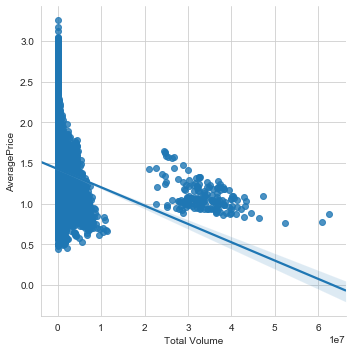

In [39]:
sns.lmplot("Total Volume","AveragePrice",data=avocado_df)

#### We can see from both the curves that Price and volume are inversely propotional. As average price increase, the volume sold decreases.
#### From the second graph, there is linear inverse relationship between Average price and Total volume sold.